In [1]:
import numpy as np
import scipy as sp
from itertools import combinations
import matplotlib.pyplot as plt

In [ ]:
def generator_basis_set(tot_sites, N_e_up, N_e_down): # Tested OK
    spin_up_basis = []
    spin_down_basis = []

    for comb_up in combinations(range(tot_sites), N_e_up):
        state = [0] * tot_sites
        for idx in comb_up:
            state[idx] = 1
        spin_up_basis.append(state)

    for comb_down in combinations(range(tot_sites), N_e_down):
        state = [0] * tot_sites
        for idx in comb_down:
            state[idx] = 1
        spin_down_basis.append(state)

    basis = []

    for up_state in spin_up_basis:
        for down_state in spin_down_basis:
            basis.append([up_state, down_state])
    
    return np.array(basis)



def hop_j_2_k(input_state, j, k, spin): # Tested OK
    if input_state[spin][j] == 0 or input_state[spin][k] == 1:
        return 0, None
    
    state = input_state.copy()
    
    sign = 1

    # Destrying the particle

    for i in range(j):
        if state[spin][i] == 1:
            sign = sign * (-1)
    
    state[spin][j] = 0

    # Create the particle

    for i in range(k):
        if state[spin][i] == 1:
            sign = sign * (-1)
    
    state[spin][k] = 1

    return sign, state



def map_state_2_idx(basis_set): # Tested OK
    return {tuple(np.concatenate((state[0], state[1]))) : i for i, state in enumerate(basis_set)}



def generate_hamiltonian(basis_set, dim, tot_sites, U, J_1, J_11, J_3, J_33):

    state_2_idx_mapping = map_state_2_idx(basis_set)
    H = np.zeros((dim, dim))

    for a in range(dim):
        state = basis_set[a].copy()

        # Interaction Potential Energy

        for i in range(tot_sites):
            H[a, a] += U * state[0][i] * state[1][i]
        
        # Kinetic Energy

        for s in range(2):
            for j in range(tot_sites):
                for k in [j + 1, j - 1, j + 3, j - 3]:
                    if (k >= tot_sites) or (k < 0):
                        continue

                    hopped_state_sign, hopped_state = hop_j_2_k(state, j, k, s)
                    
                    if hopped_state_sign == 0:
                        continue

                    b = state_2_idx_mapping[tuple(np.concatenate((hopped_state[0], hopped_state[1])))]

                    # # Test Print
                    # print(state[0], state[1], '------', s, '---', hopped_state[0], hopped_state[1], '---', hopped_state_sign, '--', b + 1)

                    if j % 2 == 0: # Identifies site A

                        if k == j + 1:
                            H[a, b] -= J_11 * hopped_state_sign

                        elif k == j - 1:
                            H[a, b] -= J_1 * hopped_state_sign

                        elif k == j + 3:
                            H[a, b] -= J_33 * hopped_state_sign
                        
                        else:
                            H[a, b] -= J_3 * hopped_state_sign
                    
                    else: # Identifies site B
                        if k == j + 1:
                            H[a, b] -= J_1 * hopped_state_sign

                        elif k == j - 1:
                            H[a, b] -= J_11 * hopped_state_sign

                        elif k == j + 3:
                            H[a, b] -= J_3 * hopped_state_sign
                        
                        else:
                            H[a, b] -= J_33 * hopped_state_sign

    return H




In [7]:
tot_sites = 4
N_e_up = tot_sites // 2
N_e_down = N_e_up
J_11 = 1
J_1 = 2
J_33 = 3
J_3 = 4
U = 10

In [14]:
basis_set = generator_basis_set(tot_sites, N_e_up, N_e_down)
dim = len(basis_set)

H = generate_hamiltonian(basis_set, dim, tot_sites, U, J_1, J_11, J_3, J_33)

# print(H)

# print(len(basis_set))
# print()
# print(basis_set)
print(sp.linalg.ishermitian(H))

[1 1 0 0] [1 1 0 0] ------ 0 --- [0 1 0 1] [1 1 0 0] --- -1 -- 25
[1 1 0 0] [1 1 0 0] ------ 0 --- [1 0 1 0] [1 1 0 0] --- 1 -- 7
[1 1 0 0] [1 1 0 0] ------ 1 --- [1 1 0 0] [0 1 0 1] --- -1 -- 5
[1 1 0 0] [1 1 0 0] ------ 1 --- [1 1 0 0] [1 0 1 0] --- 1 -- 2
[1 1 0 0] [1 0 1 0] ------ 0 --- [0 1 0 1] [1 0 1 0] --- -1 -- 26
[1 1 0 0] [1 0 1 0] ------ 0 --- [1 0 1 0] [1 0 1 0] --- 1 -- 8
[1 1 0 0] [1 0 1 0] ------ 1 --- [1 1 0 0] [0 1 1 0] --- 1 -- 4
[1 1 0 0] [1 0 1 0] ------ 1 --- [1 1 0 0] [0 0 1 1] --- -1 -- 6
[1 1 0 0] [1 0 1 0] ------ 1 --- [1 1 0 0] [1 0 0 1] --- 1 -- 3
[1 1 0 0] [1 0 1 0] ------ 1 --- [1 1 0 0] [1 1 0 0] --- 1 -- 1
[1 1 0 0] [1 0 0 1] ------ 0 --- [0 1 0 1] [1 0 0 1] --- -1 -- 27
[1 1 0 0] [1 0 0 1] ------ 0 --- [1 0 1 0] [1 0 0 1] --- 1 -- 9
[1 1 0 0] [1 0 0 1] ------ 1 --- [1 1 0 0] [0 1 0 1] --- 1 -- 5
[1 1 0 0] [1 0 0 1] ------ 1 --- [1 1 0 0] [1 0 1 0] --- 1 -- 2
[1 1 0 0] [0 1 1 0] ------ 0 --- [0 1 0 1] [0 1 1 0] --- -1 -- 28
[1 1 0 0] [0 1 1 0] ------ 0 -

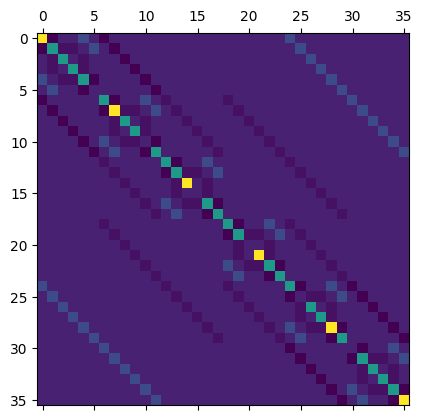

In [10]:
plt.matshow(H)
plt.show()

In [9]:
state_2_idx_mapping = map_state_2_idx(basis_set)

for key in state_2_idx_mapping:
    print(np.array(key[0: tot_sites]), np.array(key[tot_sites: 2 * tot_sites]), ' : ', state_2_idx_mapping[key])

[1 1 0 0] [1 1 0 0]  :  0
[1 1 0 0] [1 0 1 0]  :  1
[1 1 0 0] [1 0 0 1]  :  2
[1 1 0 0] [0 1 1 0]  :  3
[1 1 0 0] [0 1 0 1]  :  4
[1 1 0 0] [0 0 1 1]  :  5
[1 0 1 0] [1 1 0 0]  :  6
[1 0 1 0] [1 0 1 0]  :  7
[1 0 1 0] [1 0 0 1]  :  8
[1 0 1 0] [0 1 1 0]  :  9
[1 0 1 0] [0 1 0 1]  :  10
[1 0 1 0] [0 0 1 1]  :  11
[1 0 0 1] [1 1 0 0]  :  12
[1 0 0 1] [1 0 1 0]  :  13
[1 0 0 1] [1 0 0 1]  :  14
[1 0 0 1] [0 1 1 0]  :  15
[1 0 0 1] [0 1 0 1]  :  16
[1 0 0 1] [0 0 1 1]  :  17
[0 1 1 0] [1 1 0 0]  :  18
[0 1 1 0] [1 0 1 0]  :  19
[0 1 1 0] [1 0 0 1]  :  20
[0 1 1 0] [0 1 1 0]  :  21
[0 1 1 0] [0 1 0 1]  :  22
[0 1 1 0] [0 0 1 1]  :  23
[0 1 0 1] [1 1 0 0]  :  24
[0 1 0 1] [1 0 1 0]  :  25
[0 1 0 1] [1 0 0 1]  :  26
[0 1 0 1] [0 1 1 0]  :  27
[0 1 0 1] [0 1 0 1]  :  28
[0 1 0 1] [0 0 1 1]  :  29
[0 0 1 1] [1 1 0 0]  :  30
[0 0 1 1] [1 0 1 0]  :  31
[0 0 1 1] [1 0 0 1]  :  32
[0 0 1 1] [0 1 1 0]  :  33
[0 0 1 1] [0 1 0 1]  :  34
[0 0 1 1] [0 0 1 1]  :  35


In [6]:
j = 2
k = j + 3

state = basis_set[200]
spin = 1

hopped_state_sign, hopped_state = hop_j_2_k(state, j, k, spin)

print(state)
print(hopped_state_sign, '\n', hopped_state)

[[1 1 1 0 0 1 0 0]
 [0 0 1 1 0 0 1 1]]
-1 
 [[1 1 1 0 0 1 0 0]
 [0 0 0 1 0 1 1 1]]
